In [ ]:
from google.colab import drive
 
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data PreProcessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/deep/hw4/GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2008,2021-12-13,2968.879883,2971.250000,2927.199951,2934.090088,2934.090088,1205200
2009,2021-12-14,2895.399902,2908.840088,2844.850098,2899.409912,2899.409912,1238900
2010,2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000
2011,2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,2896.770020,1370000
2012,2021-12-17,2854.290039,2889.201904,2835.760010,2856.060059,2856.060059,2162800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2013 non-null   object 
 1   Open       2013 non-null   float64
 2   High       2013 non-null   float64
 3   Low        2013 non-null   float64
 4   Close      2013 non-null   float64
 5   Adj Close  2013 non-null   float64
 6   Volume     2013 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.2+ KB


## Split train/test

In [ ]:
train_data = data[data['Date'] < '2021-01-01'].copy()
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-20,542.117981,548.528992,541.968567,548.255005,548.255005,6547651
1,2013-12-23,551.851501,555.816650,550.496582,555.467957,555.467957,3456106
2,2013-12-24,555.403198,555.537720,551.981018,553.844055,553.844055,1473904
3,2013-12-26,554.924988,557.410706,552.274963,556.643555,556.643555,2685629
4,2013-12-27,557.908813,558.048279,554.392029,557.111816,557.111816,3151167


In [ ]:
test_data = data[data['Date'] >= '2021-01-01'].copy()
# for the first data in test set, 30 previous days should be appended from tail of train data
previous_30_days = train_data.tail(30)
test_data = previous_30_days.append(test_data, ignore_index = True)
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-18,1765.229980,1773.469971,1746.140015,1746.780029,1746.780029,1173500
1,2020-11-19,1738.380005,1769.589966,1737.005005,1763.920044,1763.920044,1249900
2,2020-11-20,1765.209961,1774.000000,1741.859985,1742.189941,1742.189941,2313500
3,2020-11-23,1749.599976,1753.900024,1717.719971,1734.859985,1734.859985,2161600
4,2020-11-24,1730.500000,1771.599976,1727.689941,1768.880005,1768.880005,1578000


In [ ]:
# remove all cols except close
train_data1 = train_data.drop(['Date','Open','High','Low','Adj Close','Volume'], axis = 1)
test_data1 = test_data.drop(['Date','Open','High','Low','Adj Close','Volume'], axis = 1)
train_data1.head()

,Close
0,548.255005
1,555.467957
2,553.844055
3,556.643555
4,557.111816


In [ ]:
# remove only date close cause its string and not important
train_data = train_data.drop(['Date'], axis = 1)
test_data = test_data.drop(['Date'], axis = 1)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
0,542.117981,548.528992,541.968567,548.255005,548.255005,6547651
1,551.851501,555.816650,550.496582,555.467957,555.467957,3456106
2,555.403198,555.537720,551.981018,553.844055,553.844055,1473904
3,554.924988,557.410706,552.274963,556.643555,556.643555,2685629
4,557.908813,558.048279,554.392029,557.111816,557.111816,3151167


## Normalization

In [ ]:
# normalize between 0 and 1
scaler = MinMaxScaler()

In [ ]:
train_data = scaler.fit_transform(train_data)
train_data

array([[0.03667475, 0.03985783, 0.04171091, 0.04267959, 0.04267959,
        0.58566104],
       [0.04398646, 0.04524579, 0.04809212, 0.04807532, 0.04807532,
        0.30879981],
       [0.04665445, 0.04503957, 0.04920288, 0.04686054, 0.04686054,
        0.13128503],
       ...,
       [0.97240887, 0.95951446, 0.95019544, 0.94818177, 0.94818177,
        0.11565745],
       [0.95304322, 0.93929759, 0.92738085, 0.93381903, 0.93381903,
        0.11625746],
       [0.93306915, 0.9347397 , 0.93472886, 0.94306505, 0.94306505,
        0.08991058]])

In [ ]:
test_data = scaler.fit_transform(test_data)

In [ ]:
train_data1 = scaler.fit_transform(train_data1)
train_data1

array([[0.04267959],
       [0.04807532],
       [0.04686054],
       ...,
       [0.94818177],
       [0.93381903],
       [0.94306505]])

In [ ]:
test_data1 = scaler.fit_transform(test_data1)

## Chuncking

In [ ]:
len(test_data)

273

In [ ]:
x_train = []
y_train = []
for i in range(30, train_data.shape[0]):
    x_train.append(train_data[i-30:i])
    y_train.append(train_data[i,3])
x_train, y_train = np.array(x_train), np.array(y_train)
print("Total size of train data is : {}".format(x_train.shape))
print("Total size of y_train data is : {}".format(y_train.shape))

x_test = []
y_test = []
for i in range(30, test_data.shape[0]):
    x_test.append(test_data[i-30:i])
    y_test.append(test_data[i,3])
x_test, y_test = np.array(x_test), np.array(y_test)
print("Total size of test data is : {}".format(x_test.shape))
print("Total size of y_test data is : {}".format(y_test.shape))

Total size of train data is : (1740, 30, 6)
Total size of y_train data is : (1740,)
Total size of test data is : (243, 30, 6)
Total size of y_test data is : (243,)


In [ ]:
x_train1 = []
y_train1 = []
for i in range(30, train_data1.shape[0]):
    x_train1.append(train_data1[i-30:i])
    y_train1.append(train_data1[i, 0])
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
print("Total size of train data is : {}".format(x_train1.shape))

x_test1 = []
y_test1 = []
for i in range(30, test_data1.shape[0]):
    x_test1.append(test_data1[i-30:i])
    y_test1.append(test_data1[i,0])
x_test1, y_test1 = np.array(x_test1), np.array(y_test1)
print("Total size of test data is : {}".format(x_test1.shape))

Total size of train data is : (1740, 30, 1)
Total size of test data is : (243, 30, 1)


# Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [ ]:
def create_mode(num_layer, rnn_type,x_train):
  model1 = Sequential()
  if rnn_type == "lstm":
    model1.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
    model1.add(Dropout(0.2))
    if num_layer>2:
      for i in range(0,num_layer-2):
        model1.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
        model1.add(Dropout(0.2))
    model1.add(LSTM(units = 60, activation = 'tanh'))
    model1.add(Dropout(0.2))
  else:
    model1.add(GRU(units = 60, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
    model1.add(Dropout(0.2))
    if num_layer>2:
      for i in range(0,num_layer-2):
        model1.add(GRU(units = 60, activation = 'tanh', return_sequences = True))
        model1.add(Dropout(0.2))
    model1.add(GRU(units = 60, activation = 'tanh'))
    model1.add(Dropout(0.2))
  model1.add(Dense(units = 1))
  model1.summary()
  model1.compile(optimizer='adam', loss = 'mean_squared_error')
  return model1

# Train

## LSTM + x_train1

In [ ]:
rnn_type = "lstm"

### 1 layer

In [ ]:
model1 = create_mode(1, rnn_type,x_train1)
model1.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 30, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 43,981
Trainable params: 43,981
Non-trainable params: 0
_________________________________________________________________


### 2 layer

In [ ]:
model2 = create_mode(2, rnn_type,x_train1)
model2.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 60)            14880     
                                                                 
 dropout_2 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 43,981
Trainable params: 43,981
Non-trainable params: 0
_________________________________________________________________


### 3 layer

In [ ]:
model3 = create_mode(3, rnn_type,x_train1)
model3.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 60)            14880     
                                                                 
 dropout_4 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_6 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

### 4 layer

In [ ]:
model4 = create_mode(4, rnn_type,x_train1)
model4.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 30, 60)            14880     
                                                                 
 dropout_7 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_8 (LSTM)               (None, 30, 60)            29040     
                                                                 
 dropout_8 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_9 (LSTM)               (None, 30, 60)            29040     
                                                                 
 dropout_9 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60)               

## LSTM + x_train

In [ ]:
rnn_type = "lstm"

### 1 layer

In [ ]:
y_train.shape

(1740,)

In [ ]:
model1_1 = create_mode(1, rnn_type,x_train)
model1_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 30, 60)            16080     
                                                                 
 dropout_11 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_12 (LSTM)              (None, 60)                29040     
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
Total params: 45,181
Trainable params: 45,181
Non-trainable params: 0
_________________________________________________________________


### 2 layer

In [ ]:
model2_1 = create_mode(2, rnn_type,x_train)
model2_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 30, 60)            16080     
                                                                 
 dropout_13 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_14 (LSTM)              (None, 60)                29040     
                                                                 
 dropout_14 (Dropout)        (None, 60)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 45,181
Trainable params: 45,181
Non-trainable params: 0
_________________________________________________________________


### 3 layer

In [ ]:
model3_1 = create_mode(3, rnn_type,x_train)
model3_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 60)            16080     
                                                                 
 dropout_15 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_16 (LSTM)              (None, 30, 60)            29040     
                                                                 
 dropout_16 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60)                29040     
                                                                 
 dropout_17 (Dropout)        (None, 60)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

### 4 layer

In [ ]:
model4_1 = create_mode(4, rnn_type,x_train)
model4_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 60)            16080     
                                                                 
 dropout_18 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_19 (LSTM)              (None, 30, 60)            29040     
                                                                 
 dropout_19 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_20 (LSTM)              (None, 30, 60)            29040     
                                                                 
 dropout_20 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60)               

## GRU + x_train1

In [ ]:
rnn_type = "gru"

### 1 layer

In [ ]:
modelg1 = create_mode(1, rnn_type,x_train1)
modelg1.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 60)            11340     
                                                                 
 dropout_22 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_1 (GRU)                 (None, 60)                21960     
                                                                 
 dropout_23 (Dropout)        (None, 60)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 61        
                                                                 
Total params: 33,361
Trainable params: 33,361
Non-trainable params: 0
_________________________________________________________________


### 2 layer

In [ ]:
modelg2 = create_mode(2, rnn_type,x_train1)
modelg2.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 30, 60)            11340     
                                                                 
 dropout_24 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_3 (GRU)                 (None, 60)                21960     
                                                                 
 dropout_25 (Dropout)        (None, 60)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 61        
                                                                 
Total params: 33,361
Trainable params: 33,361
Non-trainable params: 0
_________________________________________________________________


### 3 layer

In [ ]:
modelg3 = create_mode(3, rnn_type,x_train1)
modelg3.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 30, 60)            11340     
                                                                 
 dropout_26 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_5 (GRU)                 (None, 30, 60)            21960     
                                                                 
 dropout_27 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_6 (GRU)                 (None, 60)                21960     
                                                                 
 dropout_28 (Dropout)        (None, 60)                0         
                                                                 
 dense_10 (Dense)            (None, 1)               

### 4 layer

In [ ]:
modelg4 = create_mode(4, rnn_type,x_train1)
modelg4.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 30, 60)            11340     
                                                                 
 dropout_29 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_8 (GRU)                 (None, 30, 60)            21960     
                                                                 
 dropout_30 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_9 (GRU)                 (None, 30, 60)            21960     
                                                                 
 dropout_31 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_10 (GRU)                (None, 60)              

## GRU + x_train

In [ ]:
rnn_type = "gru"

### 1 layer

In [ ]:
y_train.shape

(1740,)

In [ ]:
modelg1_1 = create_mode(1, rnn_type,x_train)
modelg1_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 30, 60)            12240     
                                                                 
 dropout_33 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_12 (GRU)                (None, 60)                21960     
                                                                 
 dropout_34 (Dropout)        (None, 60)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 61        
                                                                 
Total params: 34,261
Trainable params: 34,261
Non-trainable params: 0
_________________________________________________________________


### 2 layer

In [ ]:
modelg2_1 = create_mode(2, rnn_type,x_train)
modelg2_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 30, 60)            12240     
                                                                 
 dropout_35 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_14 (GRU)                (None, 60)                21960     
                                                                 
 dropout_36 (Dropout)        (None, 60)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 61        
                                                                 
Total params: 34,261
Trainable params: 34,261
Non-trainable params: 0
_________________________________________________________________


### 3 layer

In [ ]:
modelg3_1 = create_mode(3, rnn_type,x_train)
modelg3_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 30, 60)            12240     
                                                                 
 dropout_37 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_16 (GRU)                (None, 30, 60)            21960     
                                                                 
 dropout_38 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_17 (GRU)                (None, 60)                21960     
                                                                 
 dropout_39 (Dropout)        (None, 60)                0         
                                                                 
 dense_14 (Dense)            (None, 1)               

### 4 layer

In [ ]:
modelg4_1 = create_mode(4, rnn_type,x_train)
modelg4_1.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 0)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 30, 60)            12240     
                                                                 
 dropout_40 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_19 (GRU)                (None, 30, 60)            21960     
                                                                 
 dropout_41 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_20 (GRU)                (None, 30, 60)            21960     
                                                                 
 dropout_42 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_21 (GRU)                (None, 60)              

# Prediction

In [ ]:
scale = 1/(scaler.scale_[0])

In [ ]:
######### x_test1 + LSTM  #############

y_pred_1 = model1.predict(x_test1)*scale
y_pred_2 = model2.predict(x_test1)*scale
y_pred_3 = model3.predict(x_test1)*scale
y_pred_4 = model4.predict(x_test1)*scale


######### x_test + LSTM  #############

y_pred_1_1 = model1_1.predict(x_test)*scale
y_pred_2_1 = model2_1.predict(x_test)*scale
y_pred_3_1 = model3_1.predict(x_test)*scale
y_pred_4_1 = model4_1.predict(x_test)*scale


#####################################################################

######### x_test1 + GRU  #############

y_predg_1 = modelg1.predict(x_test1)*scale
y_predg_2 = modelg2.predict(x_test1)*scale
y_predg_3 = modelg3.predict(x_test1)*scale
y_predg_4 = modelg4.predict(x_test1)*scale


######### x_test + GRU  #############

y_predg_1_1 = modelg1_1.predict(x_test)*scale
y_predg_2_1 = modelg2_1.predict(x_test)*scale
y_predg_3_1 = modelg3_1.predict(x_test)*scale
y_predg_4_1 = modelg4_1.predict(x_test)*scale


## MSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_test[0]

0.003672475167917799

In [ ]:
y_test1.shape

(213,)

In [ ]:
print("mse 1 LSTM x_train1: ", mean_squared_error(y_test1*scale, y_pred_1))
print("mse 2 LSTM x_train1: ", mean_squared_error(y_test1*scale, y_pred_2))
print("mse 3 LSTM x_train1: ", mean_squared_error(y_test1*scale, y_pred_3))
print("mse 4 LSTM x_train1: ", mean_squared_error(y_test1*scale, y_pred_4),"\n" )



print("mse 1 LSTM x_train: ", mean_squared_error(y_test*scale, y_pred_1_1))
print("mse 2 LSTM x_train: ", mean_squared_error(y_test*scale, y_pred_2_1))
print("mse 3 LSTM x_train: ", mean_squared_error(y_test*scale, y_pred_3_1))
print("mse 4 LSTM x_train: ", mean_squared_error(y_test*scale, y_pred_4_1),"\n")


print("mse 1 GRU x_train1: ", mean_squared_error(y_test1*scale, y_predg_1))
print("mse 2 GRU x_train1: ", mean_squared_error(y_test1*scale, y_predg_2))
print("mse 3 GRU x_train1: ", mean_squared_error(y_test1*scale, y_predg_3))
print("mse 4 GRU x_train1: ", mean_squared_error(y_test1*scale, y_predg_4),"\n")



print("mse 1 GRU x_train: ", mean_squared_error(y_test*scale, y_predg_1_1))
print("mse 2 GRU x_train: ", mean_squared_error(y_test*scale, y_predg_2_1))
print("mse 3 GRU x_train: ", mean_squared_error(y_test*scale, y_predg_3_1))
print("mse 4 GRU x_train: ", mean_squared_error(y_test*scale, y_predg_4_1))


mse 1 LSTM x_train1:  2626.8417711643333
mse 2 LSTM x_train1:  2474.0028513664806
mse 3 LSTM x_train1:  3730.023891964224
mse 4 LSTM x_train1:  4911.276929480951 

mse 1 LSTM x_train:  2391.1980683571896
mse 2 LSTM x_train:  2981.955910429508
mse 3 LSTM x_train:  3115.3655099127604
mse 4 LSTM x_train:  4000.2177356412567 

mse 1 GRU x_train1:  2199.7597539785124
mse 2 GRU x_train1:  2865.799375036107
mse 3 GRU x_train1:  1690.2538538989927
mse 4 GRU x_train1:  1680.867280134651 

mse 1 GRU x_train:  1698.6201591238578
mse 2 GRU x_train:  1703.1493274483096
mse 3 GRU x_train:  1820.6631019882218
mse 4 GRU x_train:  2520.1162598496926


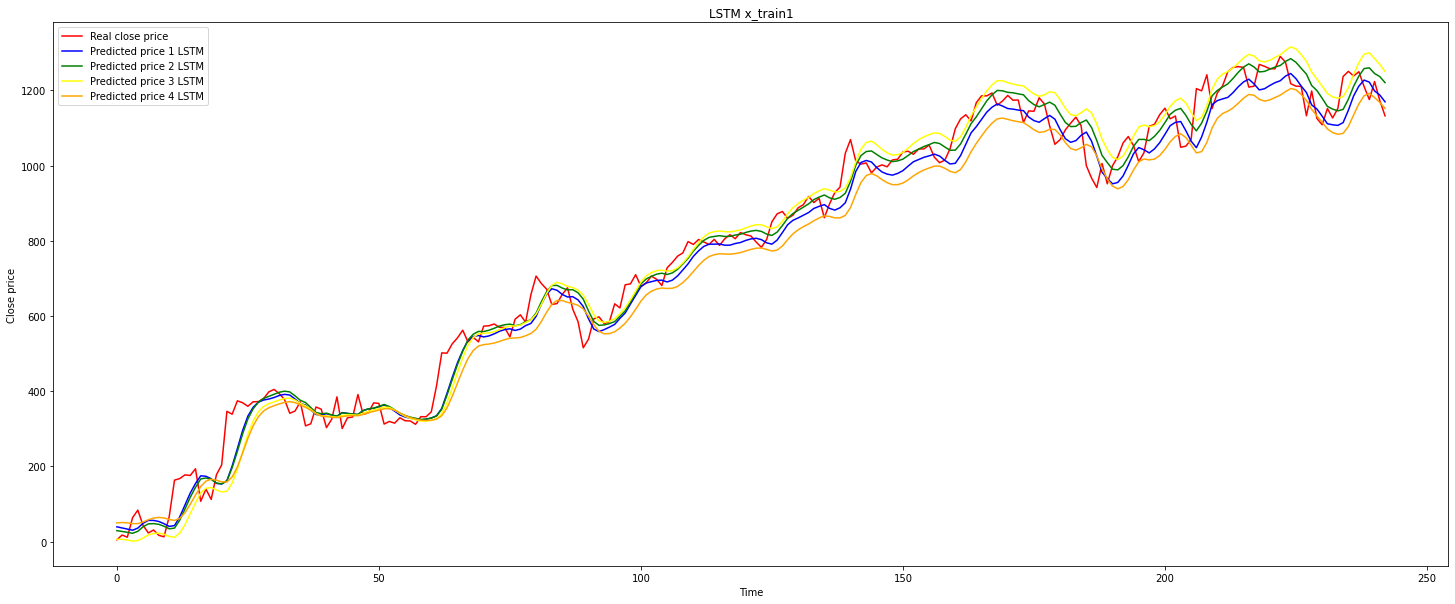

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted price 1 LSTM')
plt.plot(y_pred_2, color = 'green', label = 'Predicted price 2 LSTM')
plt.plot(y_pred_3, color = 'yellow', label = 'Predicted price 3 LSTM')
plt.plot(y_pred_4, color = 'orange', label = 'Predicted price 4 LSTM')

plt.title('LSTM x_train1')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()

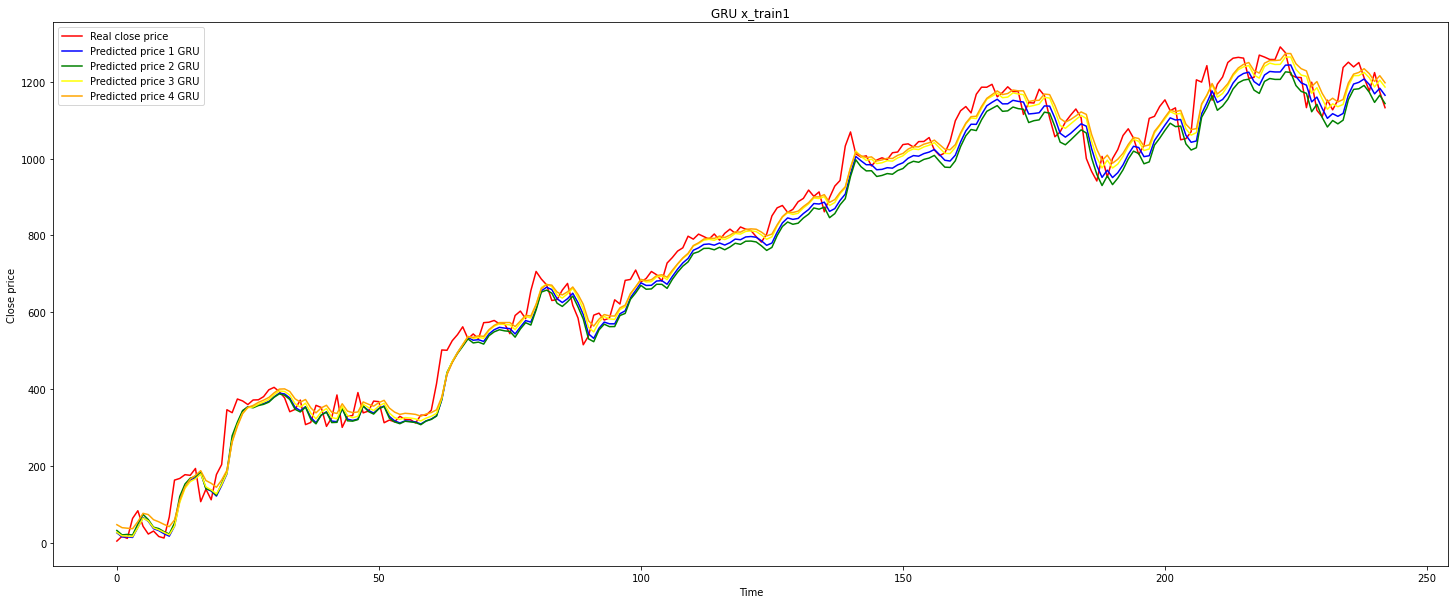

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')
plt.plot(y_predg_1, color = 'blue', label = 'Predicted price 1 GRU')
plt.plot(y_predg_2, color = 'green', label = 'Predicted price 2 GRU')
plt.plot(y_predg_3, color = 'yellow', label = 'Predicted price 3 GRU')
plt.plot(y_predg_4, color = 'orange', label = 'Predicted price 4 GRU')

plt.title('GRU x_train1')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()

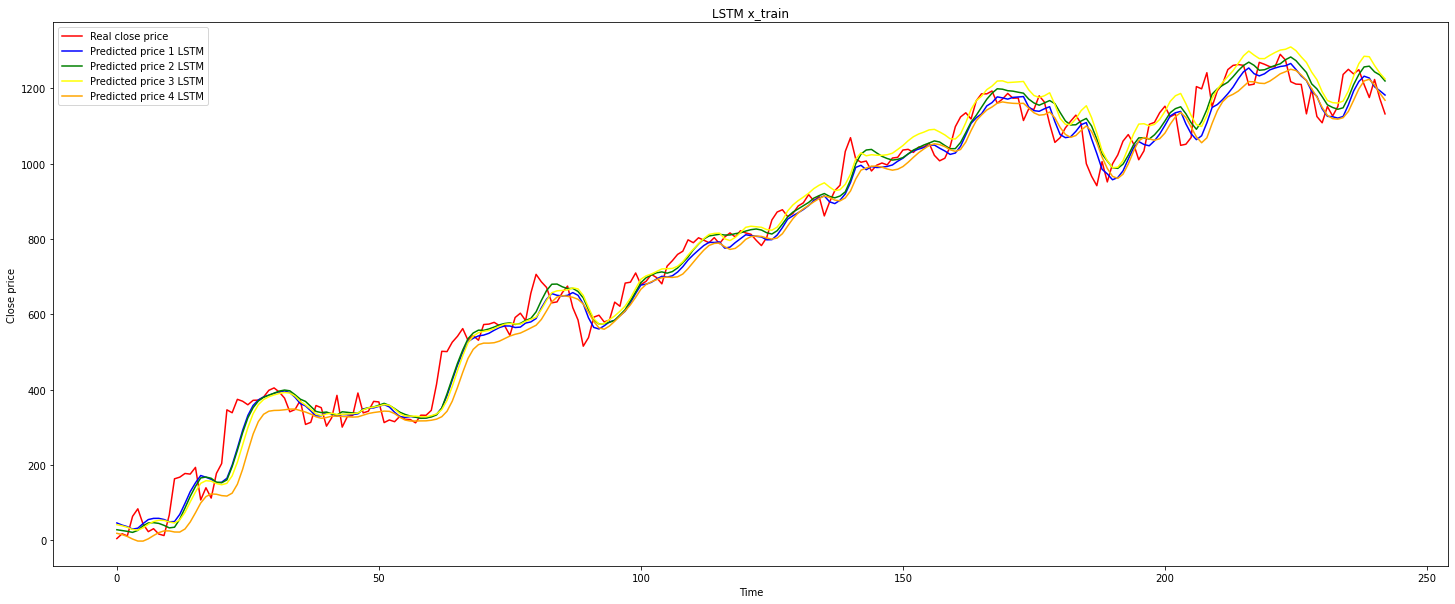

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')
plt.plot(y_pred_1_1, color = 'blue', label = 'Predicted price 1 LSTM')
plt.plot(y_pred_2-1, color = 'green', label = 'Predicted price 2 LSTM')
plt.plot(y_pred_3_1, color = 'yellow', label = 'Predicted price 3 LSTM')
plt.plot(y_pred_4_1, color = 'orange', label = 'Predicted price 4 LSTM')

plt.title('LSTM x_train')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()

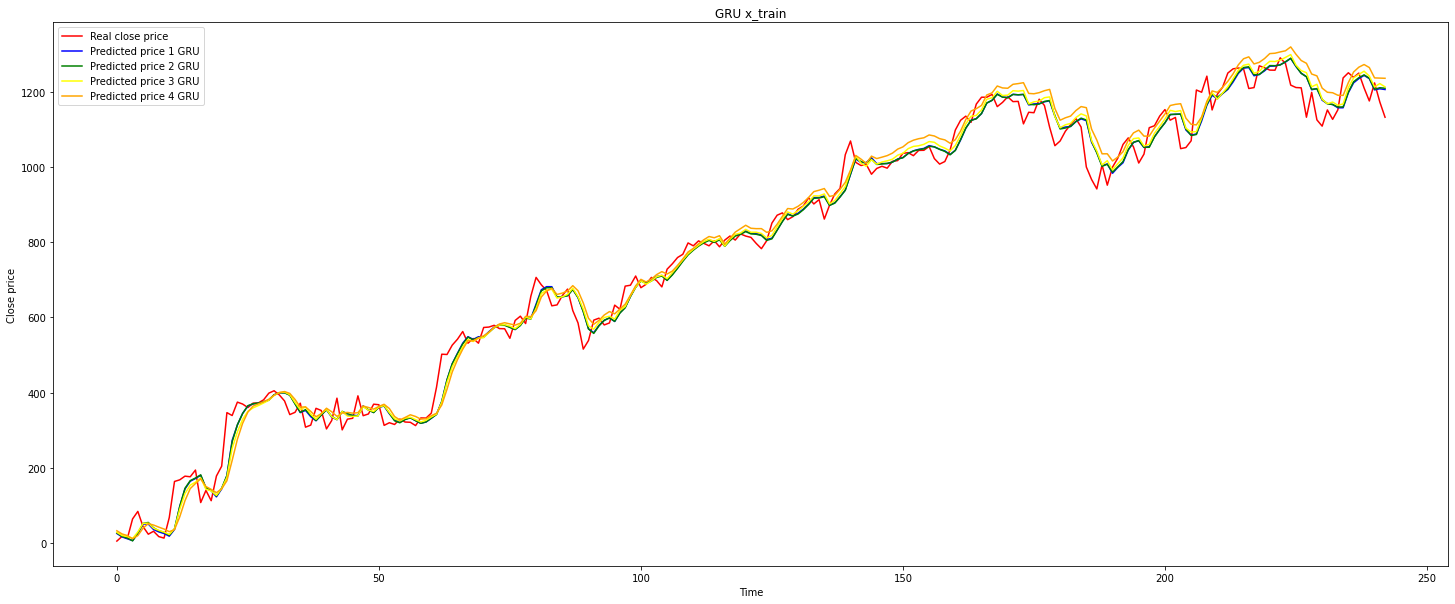

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')
plt.plot(y_predg_1_1, color = 'blue', label = 'Predicted price 1 GRU')
plt.plot(y_predg_2_1, color = 'green', label = 'Predicted price 2 GRU')
plt.plot(y_predg_3_1, color = 'yellow', label = 'Predicted price 3 GRU')
plt.plot(y_predg_4_1,color = 'orange', label = 'Predicted price 4 GRU')

plt.title('GRU x_train')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()

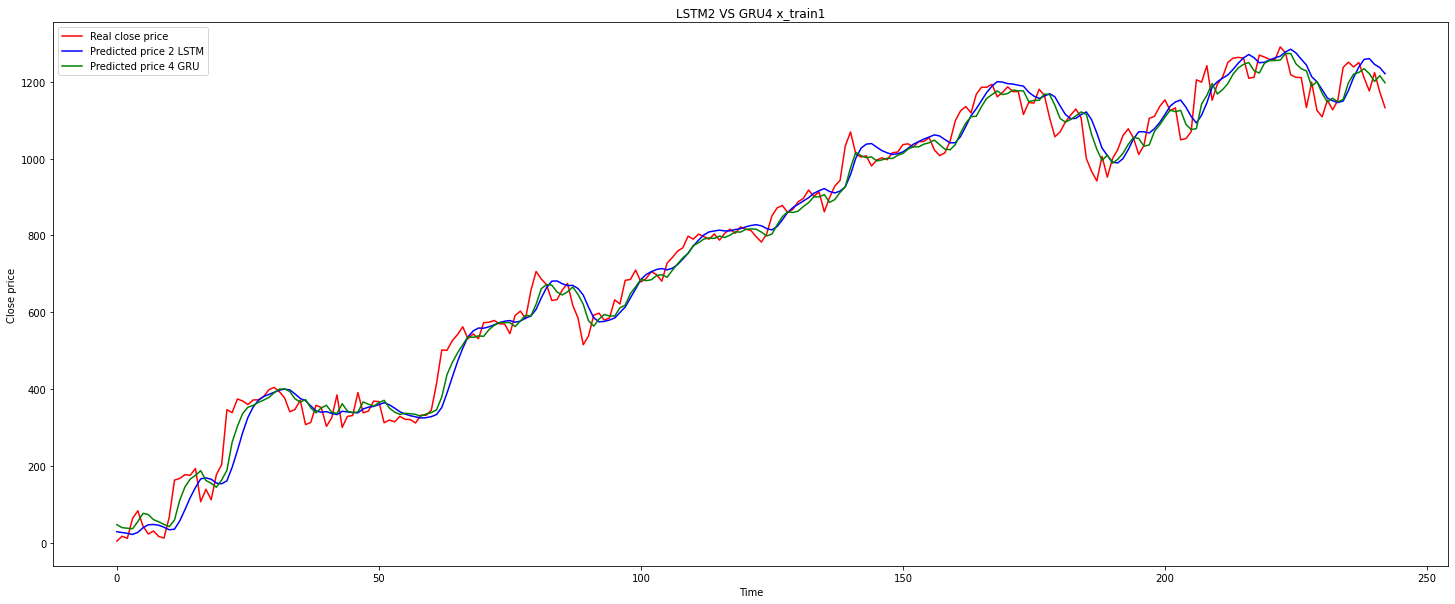

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted price 2 LSTM')

plt.plot(y_predg_4, color = 'green', label = 'Predicted price 4 GRU')

plt.title('LSTM2 VS GRU4 x_train1')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()

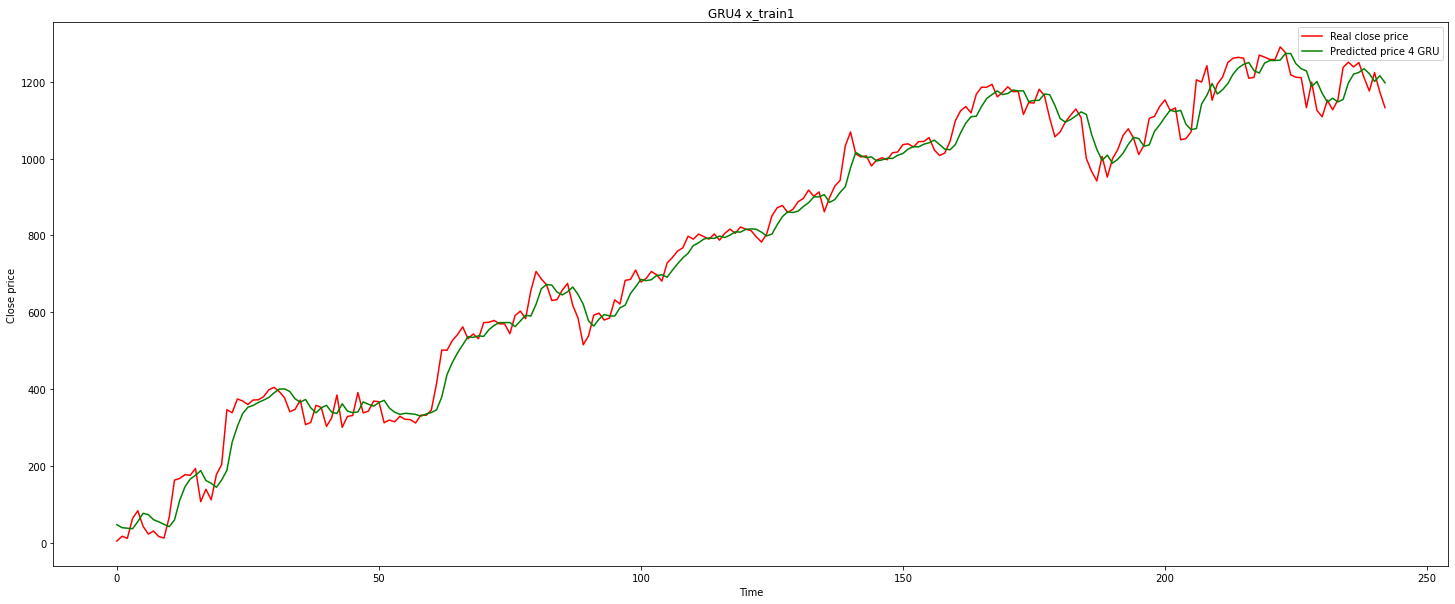

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')

plt.plot(y_predg_4, color = 'green', label = 'Predicted price 4 GRU')

plt.title('GRU4 x_train1')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()

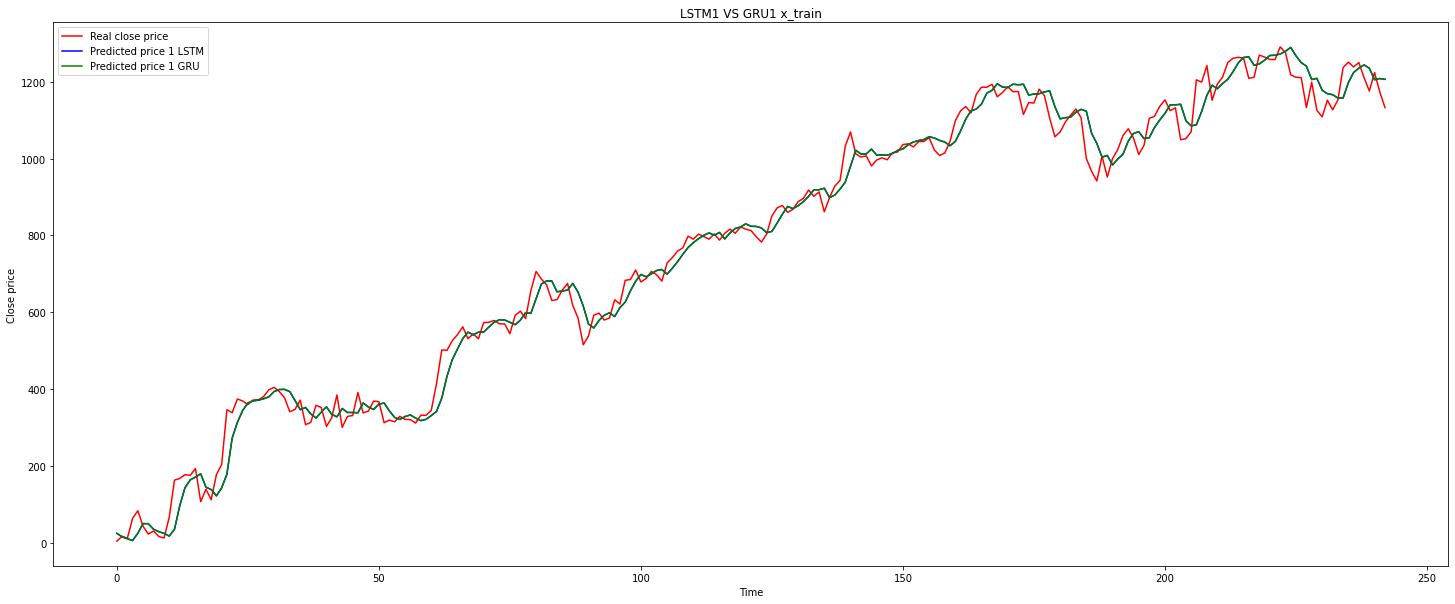

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')
plt.plot(y_predg_1_1, color = 'blue', label = 'Predicted price 1 LSTM')

plt.plot(y_predg_1_1, color = 'green', label = 'Predicted price 1 GRU')

plt.title('LSTM1 VS GRU1 x_train')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()

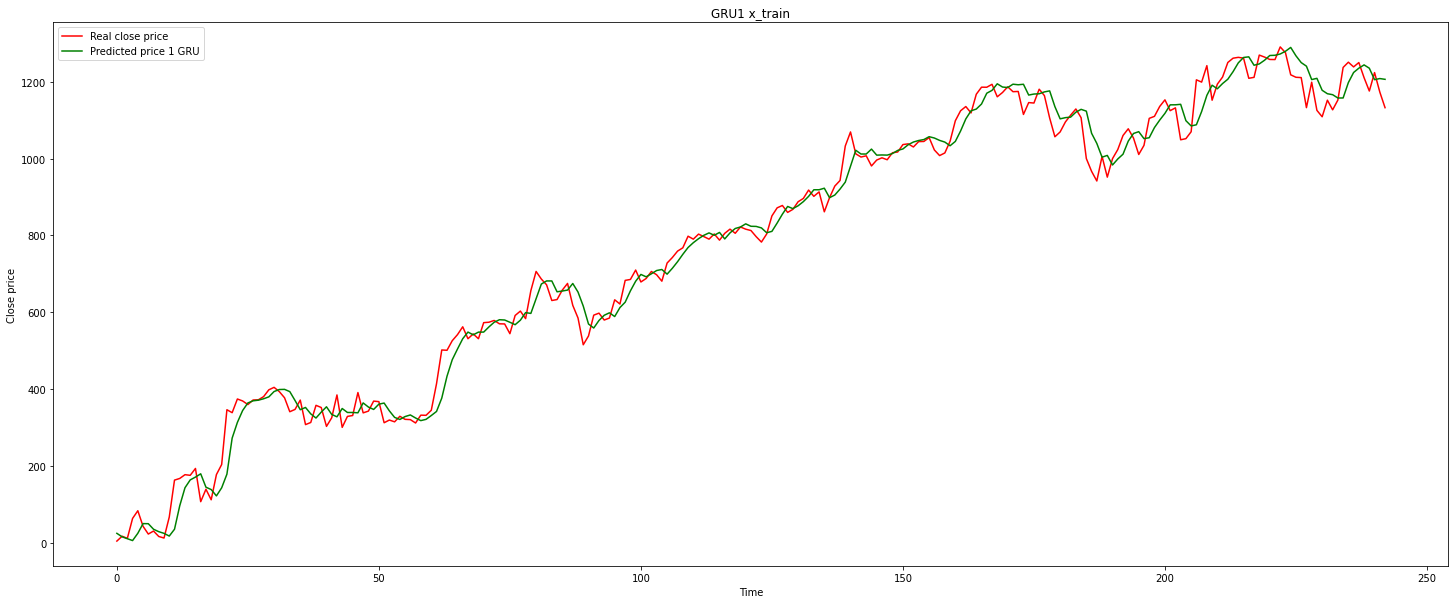

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(y_test*scale, color = 'red', label = 'Real close price')

plt.plot(y_predg_1_1, color = 'green', label = 'Predicted price 1 GRU')

plt.title('GRU1 x_train')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.legend()
plt.show()